In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("drive/MyDrive/pca_reduced_dataset.csv")

In [2]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nClass distribution:")
print(df['Churn'].value_counts())
print("\nPercentage distribution:")
print(df['Churn'].value_counts(normalize=True) * 100)

Dataset shape: (7043, 15)

First 5 rows:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.826706 -1.373583 -1.230767 -0.087034  1.283266 -0.712259  0.129103   
1 -0.201515 -0.126850 -1.014370 -0.258006 -0.705918  0.652936 -0.216050   
2 -0.456477 -1.324500 -0.911066 -0.079200 -0.499640  0.499167 -0.566206   
3 -0.176442  0.380674 -1.888965 -0.769751 -0.064559  0.539682  0.187003   
4  0.014410 -1.833934  0.274640 -0.250129  0.332321 -0.552265 -0.254106   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  Churn  
0 -0.044028  0.123456  0.226739  0.257677  0.671813  0.579817  0.011222      0  
1  0.606991 -0.826557  0.098576 -0.548355 -0.388974 -0.362146  0.618746      0  
2 -0.012590  0.036379  0.973500  0.384069  0.314796 -0.042328  0.070555      1  
3  0.527100 -0.594101 -0.337365 -0.252536 -0.640810  0.017788  0.420809      0  
4 -0.130753  0.006342 -0.006539  0.255177 -0.173405 -0.516260  0.146374      1  

Dataset info:
<class 

In [4]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split dataset test 20% train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (5634, 14)
Test set: (1409, 14)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_basic = KNeighborsClassifier(n_neighbors=5)
knn_basic.fit(X_train_scaled, y_train)

# Make predictions
y_pred_basic = knn_basic.predict(X_test_scaled)
y_pred_proba_basic = knn_basic.predict_proba(X_test_scaled)[:, 1]


In [8]:
accuracy_basic = accuracy_score(y_test, y_pred_basic)
precision_basic = precision_score(y_test, y_pred_basic)
recall_basic = recall_score(y_test, y_pred_basic)
f1_basic = f1_score(y_test, y_pred_basic)
auc_basic = roc_auc_score(y_test, y_pred_proba_basic)

print(f"Accuracy:  {accuracy_basic:.4f}")
print(f"Precision: {precision_basic:.4f}")
print(f"Recall:    {recall_basic:.4f}")
print(f"F1-Score:  {f1_basic:.4f}")
print(f"AUC-ROC:   {auc_basic:.4f}")

Accuracy:  0.7665
Precision: 0.5648
Recall:    0.5241
F1-Score:  0.5437
AUC-ROC:   0.7740


Confusion Matrix:
[[884 151]
 [178 196]]


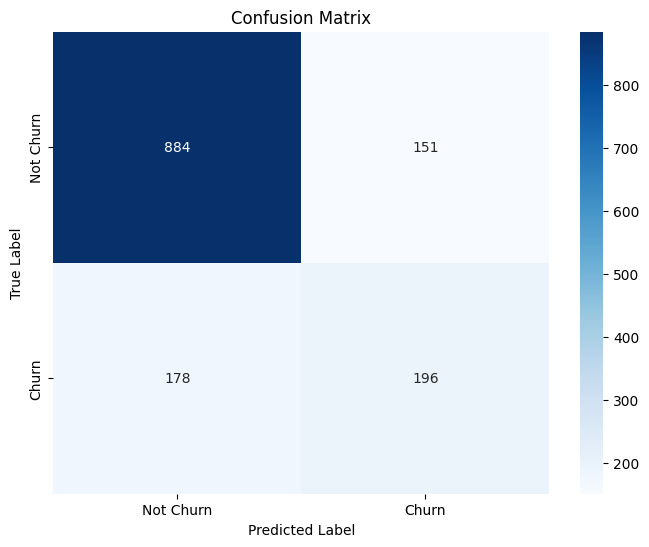

In [12]:
cm_basic = confusion_matrix(y_test, y_pred_basic)
print("Confusion Matrix:")
print(cm_basic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred_basic))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1035
           1       0.56      0.52      0.54       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [13]:
cv_basic = cross_val_score(knn_basic, scaler.fit_transform(X), y, cv=5, scoring='accuracy')
print(f"Cross-validation: {cv_basic.mean():.4f} (+/- {cv_basic.std() * 2:.4f})")

Cross-validation: 0.7643 (+/- 0.0149)


Variety 2 - Optimized KNN(K=15)

In [14]:
knn_opt = KNeighborsClassifier(n_neighbors=15)
knn_opt.fit(X_train_scaled, y_train)

# Make predictions
y_pred_opt = knn_opt.predict(X_test_scaled)
y_pred_proba_opt = knn_opt.predict_proba(X_test_scaled)[:, 1]

In [15]:
accuracy_opt = accuracy_score(y_test, y_pred_opt)
precision_opt = precision_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
auc_opt = roc_auc_score(y_test, y_pred_proba_opt)

print(f"Accuracy:  {accuracy_opt:.4f}")
print(f"Precision: {precision_opt:.4f}")
print(f"Recall:    {recall_opt:.4f}")
print(f"F1-Score:  {f1_opt:.4f}")
print(f"AUC-ROC:   {auc_opt:.4f}")

Accuracy:  0.7693
Precision: 0.5745
Recall:    0.5053
F1-Score:  0.5377
AUC-ROC:   0.8113


Confusion Matrix:
[[895 140]
 [185 189]]


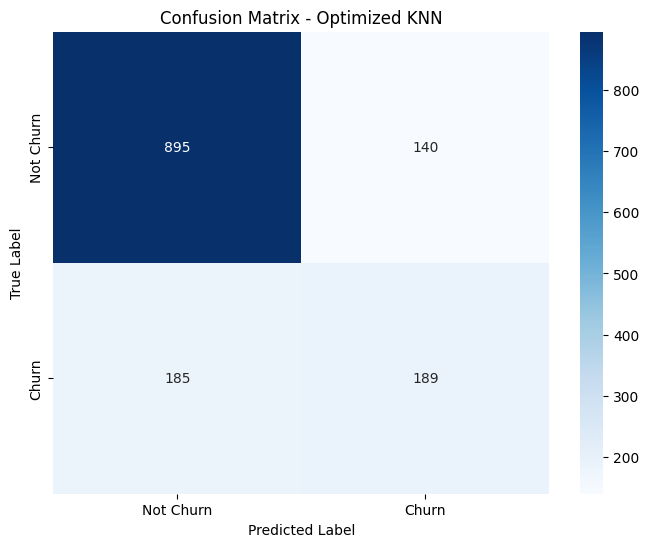

In [18]:
cm_opt = confusion_matrix(y_test, y_pred_opt)
print("Confusion Matrix:")
print(cm_opt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_opt, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Optimized KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
print("Classification Report:")
print(classification_report(y_test, y_pred_opt))

# Cross validation
cv_opt = cross_val_score(knn_opt, scaler.fit_transform(X), y, cv=5, scoring='accuracy')
print(f"Cross-validation: {cv_opt.mean():.4f} (+/- {cv_opt.std() * 2:.4f})")


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1035
           1       0.57      0.51      0.54       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409

Cross-validation: 0.7791 (+/- 0.0059)


Variety 3 - Weighted KNN

In [20]:
knn_weighted = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_weighted.fit(X_train_scaled, y_train)

# Make predictions
y_pred_weighted = knn_weighted.predict(X_test_scaled)
y_pred_proba_weighted = knn_weighted.predict_proba(X_test_scaled)[:, 1]


In [21]:
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)
auc_weighted = roc_auc_score(y_test, y_pred_proba_weighted)

print(f"Accuracy:  {accuracy_weighted:.4f}")
print(f"Precision: {precision_weighted:.4f}")
print(f"Recall:    {recall_weighted:.4f}")
print(f"F1-Score:  {f1_weighted:.4f}")
print(f"AUC-ROC:   {auc_weighted:.4f}")

Accuracy:  0.7594
Precision: 0.5529
Recall:    0.4893
F1-Score:  0.5191
AUC-ROC:   0.7893


Confusion Matrix:
[[887 148]
 [191 183]]


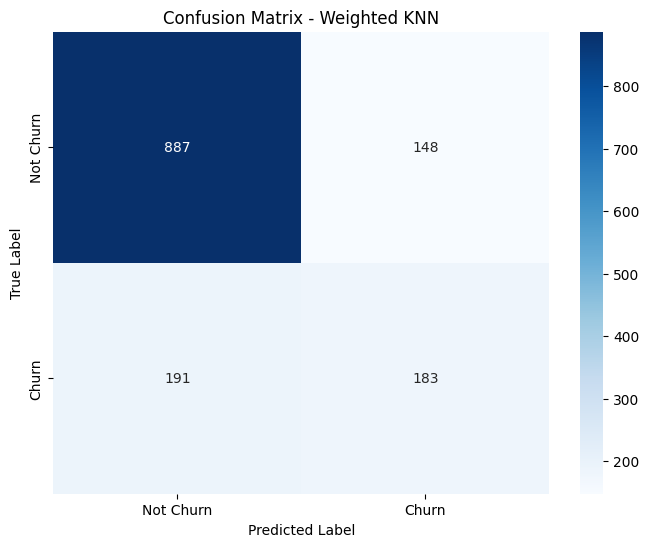

In [24]:
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
print("Confusion Matrix:")
print(cm_weighted)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_weighted, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix - Weighted KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
print("Classification Report:")
print(classification_report(y_test, y_pred_weighted))

# Cross validation
cv_weighted = cross_val_score(knn_weighted, scaler.fit_transform(X), y, cv=5, scoring='accuracy')
print(f"Cross-validation: {cv_weighted.mean():.4f} (+/- {cv_weighted.std() * 2:.4f})")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.55      0.49      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409

Cross-validation: 0.7693 (+/- 0.0117)


Comparison

In [31]:
comparison_df = pd.DataFrame({
    'Model': ['KNN Basic', 'KNN Optimized', 'KNN Weighted'],
    'Accuracy': [accuracy_basic, accuracy_opt, accuracy_weighted],
    'Precision': [precision_basic, precision_opt, precision_weighted],
    'Recall': [recall_basic, recall_opt, recall_weighted],
    'F1-Score': [f1_basic, f1_opt, f1_weighted],
    'AUC-ROC': [auc_basic, auc_opt, auc_weighted],
    'CV_Score': [cv_basic.mean(), cv_opt.mean(), cv_weighted.mean()]
})

print(comparison_df.round(4))

# Find best model for each metric
print("BEST MODEL ANALYSIS")

best_models = {}
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'CV_Score']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_score = comparison_df.loc[best_idx, metric]
    best_models[metric] = (best_model, best_score)
    print(f"{metric:12}: {best_model} ({best_score:.4f})")

# Find overall best model (based on F1-Score as balanced metric)
overall_best_model = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
overall_best_f1 = comparison_df['F1-Score'].max()

print(f"\nOVERALL BEST MODEL: {overall_best_model}")
print(f"\nBest F1-Score: {overall_best_f1:.4f}")

           Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC  CV_Score
0      KNN Basic    0.7665     0.5648  0.5241    0.5437   0.7740    0.7643
1  KNN Optimized    0.7693     0.5745  0.5053    0.5377   0.8113    0.7791
2   KNN Weighted    0.7594     0.5529  0.4893    0.5191   0.7893    0.7693
BEST MODEL ANALYSIS
Accuracy    : KNN Optimized (0.7693)
Precision   : KNN Optimized (0.5745)
Recall      : KNN Basic (0.5241)
F1-Score    : KNN Basic (0.5437)
AUC-ROC     : KNN Optimized (0.8113)
CV_Score    : KNN Optimized (0.7791)

OVERALL BEST MODEL: KNN Basic

Best F1-Score: 0.5437


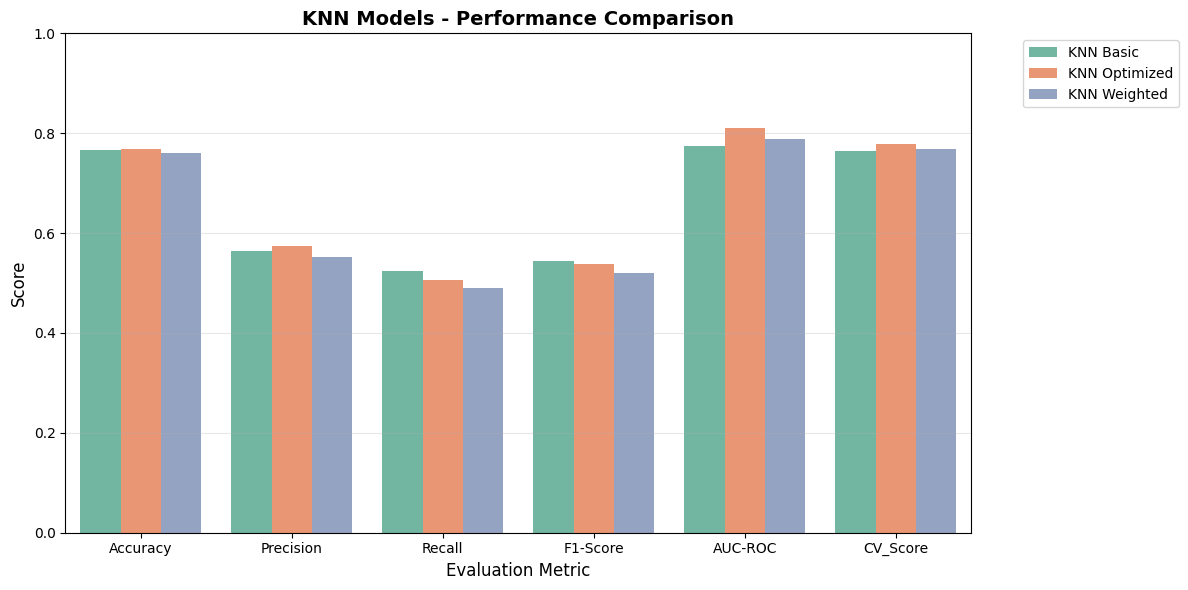

In [29]:
comparison_melted = comparison_df.melt(
    'Model',
    var_name='Metric',
    value_name='Score',
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'CV_Score']
)

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_melted,
            palette='Set2')  # Built-in color set
plt.title('KNN Models - Performance Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Evaluation Metric', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()